In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [60]:
games_df = pd.read_csv('data/games.csv')
player_play_df = pd.read_csv('data/player_play.csv')
players_df = pd.read_csv('data/players.csv')
plays_df = pd.read_csv('data/plays.csv')

In [86]:

# Tracking data
tracking_df1 = pd.read_csv('data/tracking_week_1.csv')

'''acking_df2 = pd.read_csv('data/tracking_week_2.csv')
tracking_df3 = pd.read_csv('data/tracking_week_3.csv')
tracking_df4 = pd.read_csv('data/tracking_week_4.csv')
tracking_df5 = pd.read_csv('data/tracking_week_5.csv')
tracking_df6 = pd.read_csv('data/tracking_week_6.csv')
tracking_df7 = pd.read_csv('data/tracking_week_7.csv')
tracking_df8 = pd.read_csv('data/tracking_week_8.csv')
tracking_df9 = pd.read_csv('data/tracking_week_9.csv')
'''

"acking_df2 = pd.read_csv('data/tracking_week_2.csv')\ntracking_df3 = pd.read_csv('data/tracking_week_3.csv')\ntracking_df4 = pd.read_csv('data/tracking_week_4.csv')\ntracking_df5 = pd.read_csv('data/tracking_week_5.csv')\ntracking_df6 = pd.read_csv('data/tracking_week_6.csv')\ntracking_df7 = pd.read_csv('data/tracking_week_7.csv')\ntracking_df8 = pd.read_csv('data/tracking_week_8.csv')\ntracking_df9 = pd.read_csv('data/tracking_week_9.csv')\n"

In [87]:
bills_defensive_player_plays = player_play_df[(player_play_df['teamAbbr'] == 'BUF') & (player_play_df['wasInitialPassRusher'].notna())]
bills_defensive_player_plays.head()

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,receivingYards,wasTargettedReceiver,yardageGainedAfterTheCatch,fumbles,fumbleLost,fumbleOutOfBounds,assistedTackle,forcedFumbleAsDefense,halfSackYardsAsDefense,passDefensed,quarterbackHit,sackYardsAsDefense,safetyAsDefense,soloTackle,tackleAssist,tackleForALoss,tackleForALossYardage,hadInterception,interceptionYards,fumbleRecoveries,fumbleRecoveryYards,penaltyYards,penaltyNames,wasInitialPassRusher,causedPressure,timeToPressureAsPassRusher,getOffTimeAsPassRusher,inMotionAtBallSnap,shiftSinceLineset,motionSinceLineset,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
220,2022090800,364,37075,BUF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.0,False,NaN,0.837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,2022090800,364,40107,BUF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4IR,43399.0,NaN
222,2022090800,364,40166,BUF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2L,44881.0,NaN
223,2022090800,364,41341,BUF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.0,False,NaN,0.837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,2022090800,364,44976,BUF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CFR,47853.0,NaN


In [92]:
# Get unique play ids from bills defensive player plays
# perchance remove fumbles? might affect yards gained calculation
bills_defensive_play_ids = bills_defensive_player_plays['playId'].unique()
bills_defensive_plays  = plays_df[plays_df['playId'].isin(bills_defensive_play_ids) & (plays_df['defensiveTeam'] == 'BUF')]

bills_defensive_pass_plays = bills_defensive_plays[bills_defensive_plays['passResult'].notna()]
bills_defensive_plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,playNullifiedByPenalty,absoluteYardlineNumber,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,expectedPoints,offenseFormation,receiverAlignment,playClockAtSnap,passResult,passLength,targetX,targetY,playAction,dropbackType,dropbackDistance,passLocationType,timeToThrow,timeInTackleBox,timeToSack,passTippedAtLine,unblockedPressure,qbSpike,qbKneel,qbSneak,rushLocationType,penaltyYards,prePenaltyYardsGained,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
21,2022100202,3292,(11:13) (Shotgun) L.Jackson scrambles left end...,4,2,13,BAL,BUF,BAL,29,11:13,20,20,N,39,0.432153,0.567847,0.161859,SHOTGUN,2x2,8.0,R,NaN,NaN,NaN,False,SCRAMBLE,2.83,NaN,NaN,NaN,NaN,NaN,False,NaN,0,False,INSIDE_LEFT,NaN,5,5,-0.005294,0.005294,-0.047659,True,NaN,NaN,0,Cover 6-Left,Zone
41,2022092503,1755,(2:00) 5-T. Bridgewater in at QB. (Shotgun) T....,2,1,10,MIA,BUF,MIA,44,02:00,14,14,N,54,0.478396,0.521604,1.937853,SHOTGUN,3x1,7.0,I,4.0,60.70,21.61,False,TRADITIONAL,1.17,INSIDE_BOX,1.860,1.860,NaN,False,False,False,0,NaN,NaN,NaN,0,0,-0.002589,0.002589,-0.372914,True,NaN,NaN,0,Quarters,Zone
160,2022100901,2020,(:56) (Shotgun) K.Pickett pass short right to ...,2,1,10,PIT,BUF,PIT,27,00:56,31,3,N,83,0.994619,0.005381,1.038473,SHOTGUN,3x1,15.0,C,2.0,82.00,38.54,False,TRADITIONAL,3.58,INSIDE_BOX,3.804,3.804,NaN,False,False,False,0,NaN,NaN,NaN,5,5,0.000184,-0.000184,-0.417566,True,NaN,NaN,0,Cover-2,Zone
248,2022101610,420,(7:29) (Shotgun) P.Mahomes pass short left to ...,1,1,10,KC,BUF,BUF,34,07:29,0,0,N,76,0.544287,0.455713,4.019703,SHOTGUN,2x2,10.0,C,3.0,78.82,36.69,False,DESIGNED_ROLLOUT_RIGHT,4.68,OUTSIDE_RIGHT,4.137,2.500,NaN,False,False,False,0,NaN,NaN,NaN,3,3,-0.017118,0.017118,-0.205594,True,UNDEFINED,NaN,0,Quarters,Zone
309,2022100901,3933,(2:00) (Shotgun) K.Pickett pass incomplete sho...,4,2,6,PIT,BUF,BUF,18,02:00,38,3,N,28,0.998776,0.001224,2.848906,SHOTGUN,3x1,7.0,I,3.0,24.83,23.61,False,TRADITIONAL,4.21,INSIDE_BOX,3.404,3.404,NaN,False,False,False,0,NaN,NaN,NaN,0,0,-0.000032,0.000032,-0.387086,True,NaN,NaN,0,Cover-2,Zone


In [ ]:
# split football field into sectors
# x axis is 20 sections along the length of the field(each 5 yards) and the y axis is 4 sections each 13.325 yards along the width

In [106]:
# find where BUF is contained in the row
# Assuming df is your DataFrame
buf_games = games_df[games_df.applymap(lambda x: 'BUF' in str(x)).any(axis=1)]

# Display the rows
buf_games.head()

/var/folders/tj/t9m9g2r12fd6s4n9vlvhyddm0000gn/T/ipykernel_94586/1652034794.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  buf_games = games_df[games_df.applymap(lambda x: 'BUF' in str(x)).any(axis=1)]


,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31
30,2022091900,2022,2,9/19/2022,19:15:00,BUF,TEN,41,7
36,2022092503,2022,3,9/25/2022,13:00:00,MIA,BUF,21,19
51,2022100202,2022,4,10/2/2022,13:00:00,BAL,BUF,20,23
66,2022100901,2022,5,10/9/2022,13:00:00,BUF,PIT,38,3


In [114]:
# yards gained = prePenaltyYardsGained
# pass completion percentage = out of all pass plays
# tracking location for pass: where its caught (pass_outcome_caught)
# tracking location for run: where tackle is made (tackle)

# dataframe of locations for all bills defensive players or football for every play
bills_defensive_tracking1 = tracking_df1[
    (tracking_df1['gameId'].isin(buf_games['gameId'])) &
    (tracking_df1['playId'].isin(bills_defensive_play_ids)) &
    (tracking_df1['event'] == 'tackle') &
    ((tracking_df1['club'] == 'BUF') | (tracking_df1['club'] == 'football'))
]
bills_defensive_tracking1.head(40)

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
6734892,2022090800,414,37075.0,Von Miller,95,AFTER_SNAP,2022-09-09 00:36:27.1,40.0,BUF,right,55.010000,22.140000,4.67,1.21,0.47,119.42,130.43,tackle
6734991,2022090800,414,40107.0,Micah Hyde,95,AFTER_SNAP,2022-09-09 00:36:27.1,23.0,BUF,right,77.110000,20.080000,6.92,1.56,0.70,171.38,171.32,tackle
6735090,2022090800,414,40166.0,Jordan Poyer,95,AFTER_SNAP,2022-09-09 00:36:27.1,21.0,BUF,right,71.170000,8.960000,6.69,1.86,0.68,193.51,190.28,tackle
6735288,2022090800,414,42395.0,Jordan Phillips,95,AFTER_SNAP,2022-09-09 00:36:27.1,97.0,BUF,right,63.170000,4.840000,5.52,3.03,0.58,164.42,141.92,tackle
6735684,2022090800,414,44976.0,Matt Milano,95,AFTER_SNAP,2022-09-09 00:36:27.1,58.0,BUF,right,62.350000,3.080000,6.51,1.83,0.66,134.62,143.90,tackle
6735783,2022090800,414,46085.0,Tremaine Edmunds,95,AFTER_SNAP,2022-09-09 00:36:27.1,49.0,BUF,right,63.210000,12.300000,6.70,2.45,0.68,164.93,158.26,tackle
6736080,2022090800,414,46190.0,Taron Johnson,95,AFTER_SNAP,2022-09-09 00:36:27.1,7.0,BUF,right,65.250000,28.430000,6.59,1.87,0.67,176.71,168.15,tackle
6736179,2022090800,414,46232.0,Tim Settle,95,AFTER_SNAP,2022-09-09 00:36:27.1,99.0,BUF,right,55.180000,12.710000,4.90,2.12,0.52,129.23,128.97,tackle
6736575,2022090800,414,52647.0,Dane Jackson,95,AFTER_SNAP,2022-09-09 00:36:27.1,30.0,BUF,right,59.730000,4.140000,2.58,3.40,0.27,232.65,258.91,tackle
6736674,2022090800,414,53459.0,Gregory Rousseau,95,AFTER_SNAP,2022-09-09 00:36:27.1,50.0,BUF,right,48.310000,18.860000,3.45,1.47,0.36,125.83,117.88,tackle


In [117]:
# For each row, determine which sector the player/football is in
# 0-19 for x, 0-3 for y
def get_sector(x, y):
    return (int(x / 5), int(y / 13.325))

bills_defensive_tracking1['sector'] = bills_defensive_tracking1.apply(lambda row: get_sector(row['x'], row['y']), axis=1)
bills_defensive_tracking1.head()

/var/folders/tj/t9m9g2r12fd6s4n9vlvhyddm0000gn/T/ipykernel_94586/1171420083.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bills_defensive_tracking1['sector'] = bills_defensive_tracking1.apply(lambda row: get_sector(row['x'], row['y']), axis=1)


,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,sector
6734892,2022090800,414,37075.0,Von Miller,95,AFTER_SNAP,2022-09-09 00:36:27.1,40.0,BUF,right,55.01,22.14,4.67,1.21,0.47,119.42,130.43,tackle,"(11, 1)"
6734991,2022090800,414,40107.0,Micah Hyde,95,AFTER_SNAP,2022-09-09 00:36:27.1,23.0,BUF,right,77.11,20.08,6.92,1.56,0.70,171.38,171.32,tackle,"(15, 1)"
6735090,2022090800,414,40166.0,Jordan Poyer,95,AFTER_SNAP,2022-09-09 00:36:27.1,21.0,BUF,right,71.17,8.96,6.69,1.86,0.68,193.51,190.28,tackle,"(14, 0)"
6735288,2022090800,414,42395.0,Jordan Phillips,95,AFTER_SNAP,2022-09-09 00:36:27.1,97.0,BUF,right,63.17,4.84,5.52,3.03,0.58,164.42,141.92,tackle,"(12, 0)"
6735684,2022090800,414,44976.0,Matt Milano,95,AFTER_SNAP,2022-09-09 00:36:27.1,58.0,BUF,right,62.35,3.08,6.51,1.83,0.66,134.62,143.90,tackle,"(12, 0)"


In [130]:
# calculate average yards gained in each sector
defensive_sector_count = bills_defensive_tracking1.groupby('sector').size().reset_index(name='sectorCount')
defensive_sector_count.head()

,sector,sectorCount
0,"(2, 1)",1
1,"(3, 1)",2
2,"(4, 0)",1
3,"(4, 1)",6
4,"(5, 0)",1


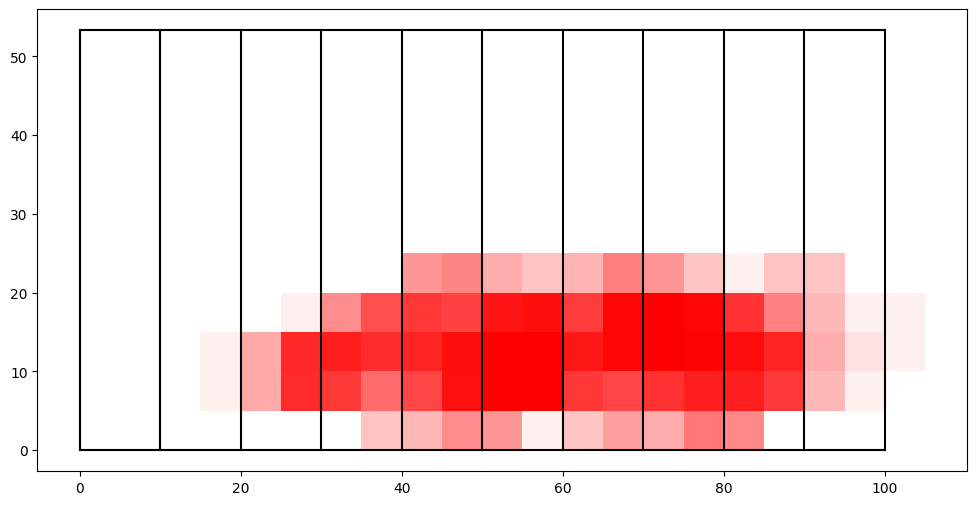

In [149]:
# Normalize the sector counts for color intensity
max_count = defensive_sector_count['sectorCount'].max()
min_count = defensive_sector_count['sectorCount'].min()

# Draw the field
plt.figure(figsize=(12, 6))

# Draw vertical lines for yard markers
for x in range(0, 101, 10):
    plt.plot([x, x], [0, 53.3], color='black')

# Draw horizontal lines for the sidelines and end zones
plt.plot([0, 100], [0, 0], color='black')  # Bottom sideline
plt.plot([0, 100], [53.3, 53.3], color='black')  # Top sideline

# Draw the defensive sector counts as colored blocks
for index, row in defensive_sector_count.iterrows():
    sector = row['sector']
    count = row['sectorCount']
    x = sector[0] * 5
    y = sector[1] * 5
    intensity = (count - min_count) / (max_count - min_count)  # Normalize intensity
    color = (1, 0, 0, intensity)  # RGBA color with varying alpha based on intensity
    rect = patches.Rectangle((x, y), 10, 10, linewidth=1, edgecolor='none', facecolor=color)
    plt.gca().add_patch(rect)

# Display the field
plt.show()